In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/var/folders/jn/5hx9ymq526v78x75qss7g_ww0000gn/T/ipykernel_20457/1654069430.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
flights = pd.read_csv('flights.csv')
flights.head()

,origin,destination,depart_time,arrive_time,airliner,duration_min,date,price,airport_origin_name,airport_destination_name
0,THD,SGN,19:30:00,21:30:00,VietJet Air,120,2024-06-26,1783800,Tho Xuan Airport,Tan Son Nhat Intl Airport
1,THD,SGN,12:55:00,14:55:00,VietJet Air,120,2024-06-26,1956600,Tho Xuan Airport,Tan Son Nhat Intl Airport
2,THD,SGN,15:20:00,17:20:00,VietJet Air,120,2024-06-26,1956600,Tho Xuan Airport,Tan Son Nhat Intl Airport
3,THD,SGN,19:30:00,21:30:00,VietJet Air,120,2024-06-27,1783800,Tho Xuan Airport,Tan Son Nhat Intl Airport
4,THD,SGN,12:55:00,14:55:00,VietJet Air,120,2024-06-27,1956600,Tho Xuan Airport,Tan Son Nhat Intl Airport


In [3]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11617 entries, 0 to 11616
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   origin                    11617 non-null  object
 1   destination               11617 non-null  object
 2   depart_time               11617 non-null  object
 3   arrive_time               11617 non-null  object
 4   airliner                  11617 non-null  object
 5   duration_min              11617 non-null  int64 
 6   date                      11617 non-null  object
 7   price                     11617 non-null  int64 
 8   airport_origin_name       11617 non-null  object
 9   airport_destination_name  11617 non-null  object
dtypes: int64(2), object(8)
memory usage: 907.7+ KB


In [4]:
len(flights)

11617

### Number of flights


In [5]:
airliner = flights['airliner'].value_counts()
airliner

airliner
Vietnam Airlines      5373
VietJet Air           5294
Bamboo Airways         648
Vietravel Airlines     302
Name: count, dtype: int64

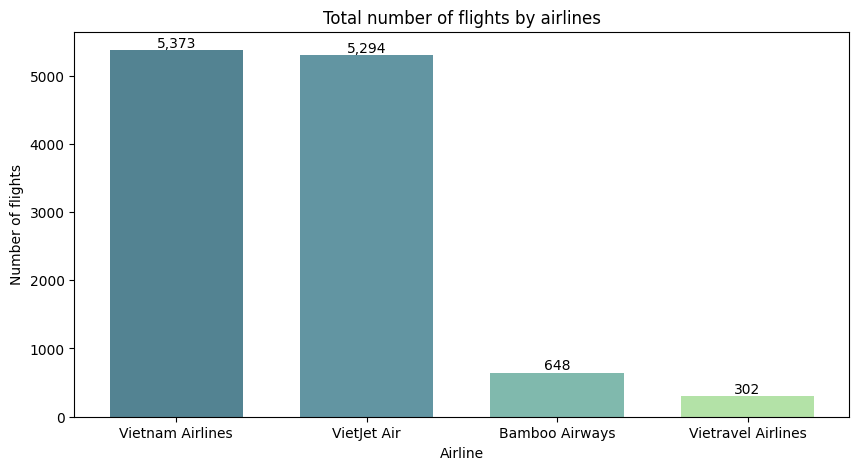

In [6]:
fig = plt.figure(figsize = (10,5))
airlines = plt.bar(airliner.index, airliner.values, color = ['#538392','#6295A2', '#80B9AD', '#B3E2A7'], width = 0.7)
plt.title('Total number of flights by airlines')
plt.xlabel('Airline')
plt.ylabel('Number of flights')
plt.bar_label(airlines, fmt = '{:,.0f}')
plt.show()

Comment: Vietnam Airlines (VNA) leads the number of flights with more than 5300 flights, while Vietravel Airlines (VAG) operates the least. Vietjet Air (VJC) has 100 less flights than Vietnam Airlines.

### Top busiest airports in Vietnam

In [7]:
ap_in = flights['airport_origin_name'].value_counts()
ap_out = flights['airport_destination_name'].value_counts()

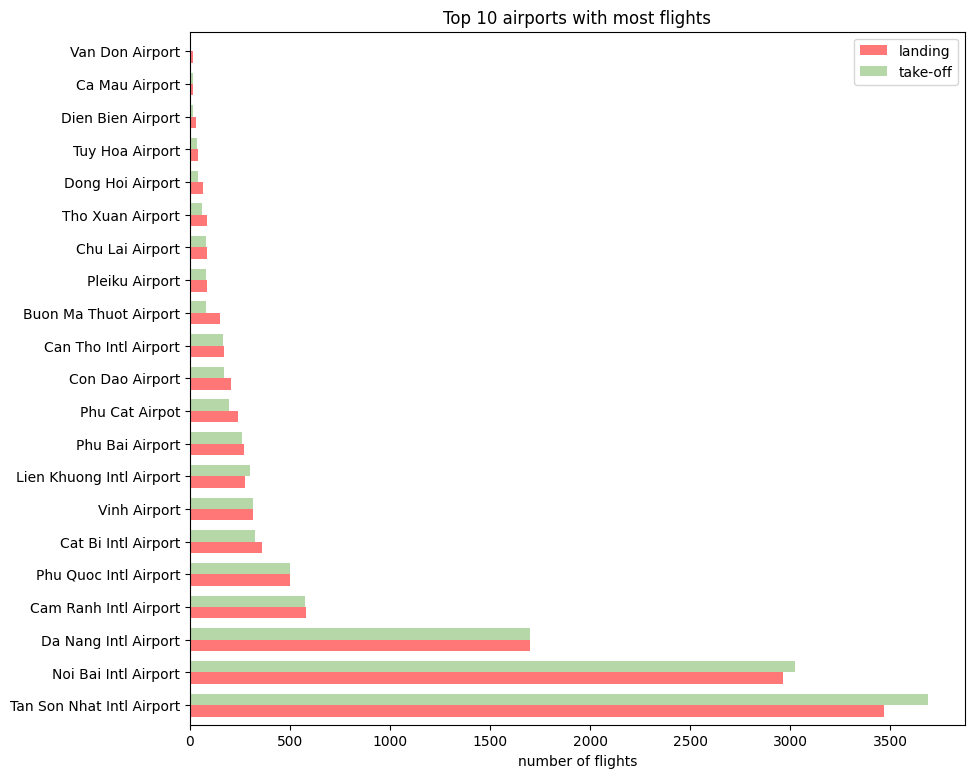

<Figure size 1000x1000 with 0 Axes>

In [8]:
new_df = pd.DataFrame(columns=['airport_name','landing', 'take-off'], data=zip(ap_in.index, ap_in.values, ap_out.values))
#new_df = new_df.head(10)
new_df.plot(x="airport_name", y=["landing", "take-off"], kind="barh", color =['#ff7777','#b6d7a8'], figsize = (10,9), width = 0.7, fontsize= 10)
plt.xlabel('number of flights')
plt.ylabel('')
plt.title('Top 10 airports with most flights')
plt.figure(figsize=(10, 10))
plt.show()

Comment: Tan Son Nhat Intl Airport (SGN), Noi Bai Intl Airport (HAN) are two important hubs in Vietnam, offering over 20 routes domestically.

### Flight time and revenue evaluation

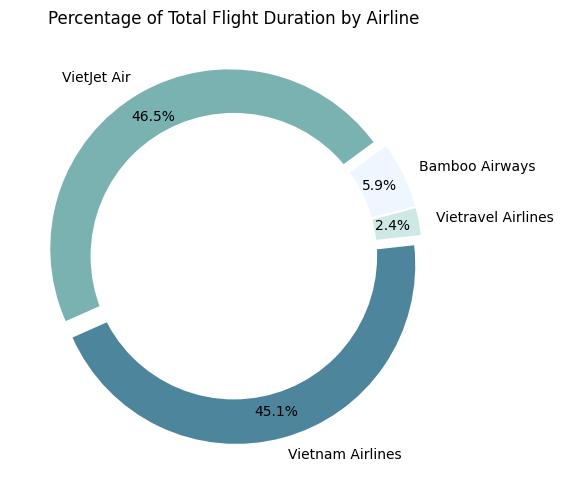

In [9]:
flight_time = flights.groupby('airliner')['duration_min'].sum().reset_index()
flight_time['duration_hours'] = flight_time['duration_min'] / 60  # Convert duration to hours

explodes = [0.05, 0.05, 0.05, 0.05]
fig = plt.figure(figsize=(10, 5))
plt.pie(flight_time['duration_hours'], 
        colors=['#EEF7FF', '#7AB2B2', '#4D869C', '#CDE8E5'], 
        labels=flight_time['airliner'], 
        autopct='%1.1f%%', 
        startangle=15, 
        pctdistance=0.85,
        explode = (0.05,0.05,0.05,0.05))
centre_circle = plt.Circle((0, 0), 0.80, fc='white')
fig.gca().add_artist(centre_circle)

plt.title('Percentage of Total Flight Duration by Airline')
plt.tight_layout()

/var/folders/jn/5hx9ymq526v78x75qss7g_ww0000gn/T/ipykernel_20457/1474297399.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flights['depart_hour'] = pd.to_datetime(flights['depart_time']).dt.hour
/var/folders/jn/5hx9ymq526v78x75qss7g_ww0000gn/T/ipykernel_20457/1474297399.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flights['arrive_hour'] = pd.to_datetime(flights['arrive_time']).dt.hour


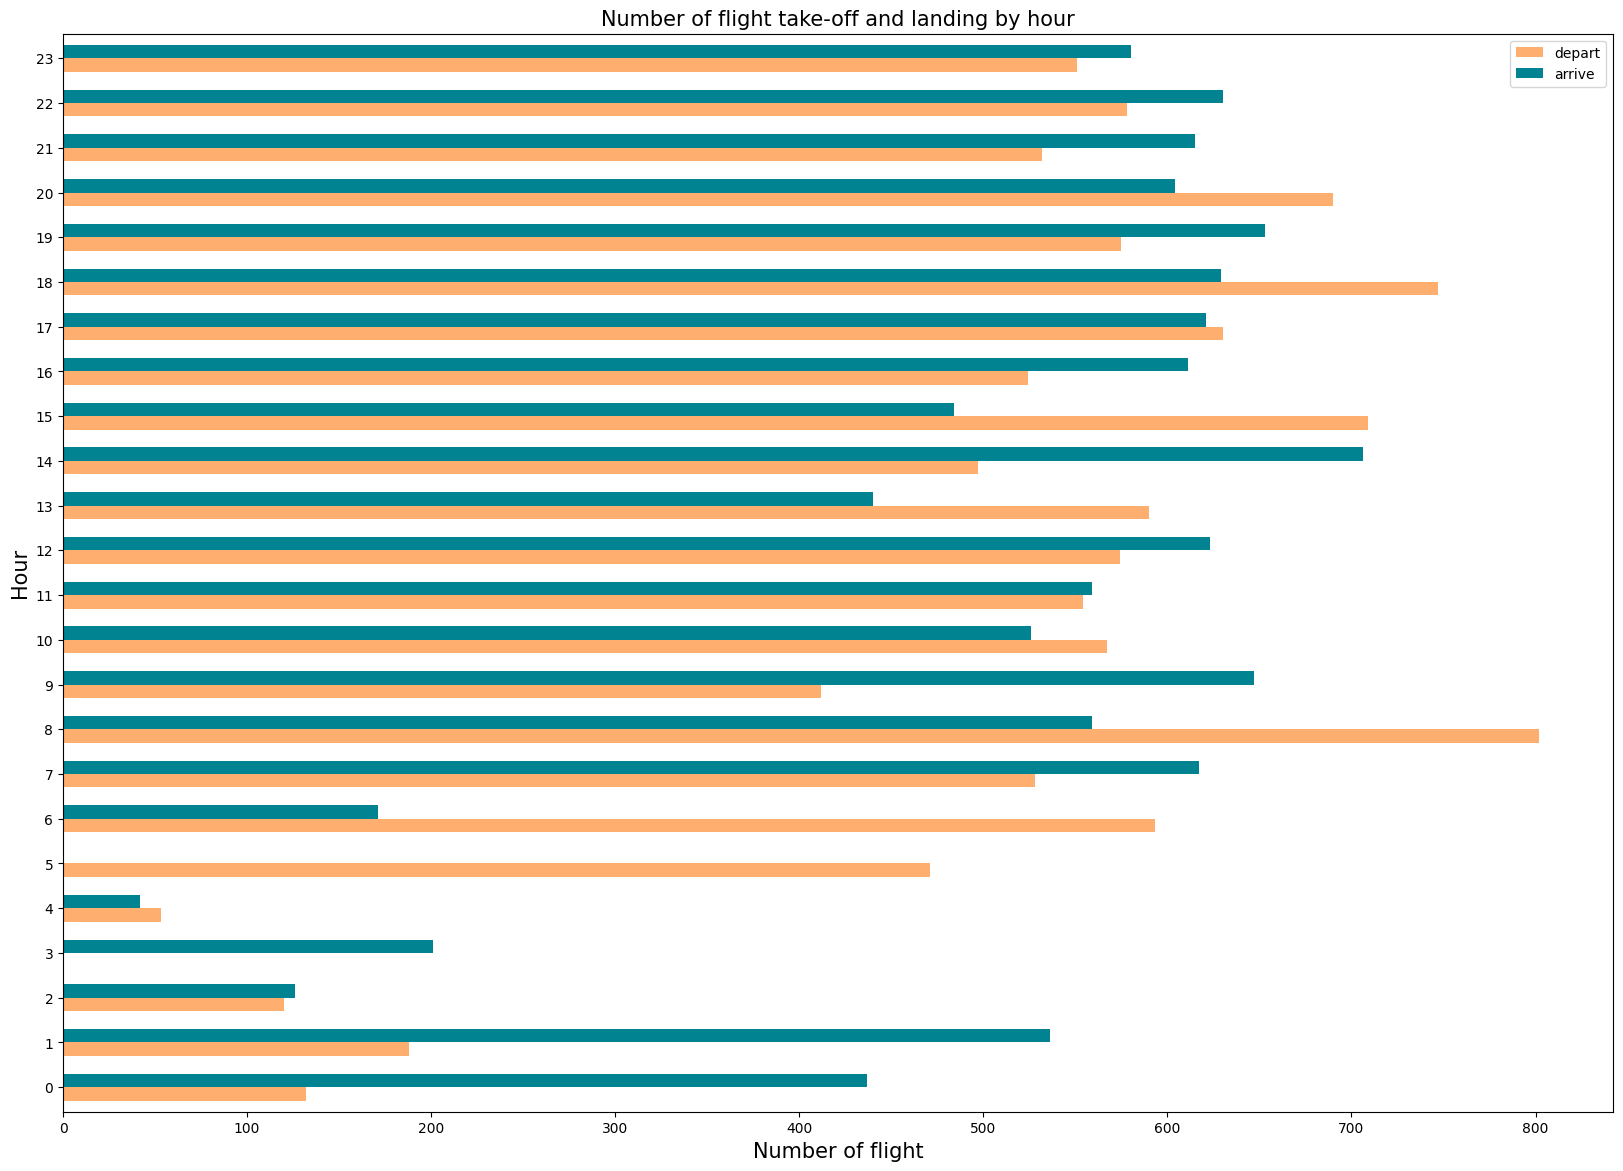

In [10]:
flights['depart_hour'] = pd.to_datetime(flights['depart_time']).dt.hour
flights['arrive_hour'] = pd.to_datetime(flights['arrive_time']).dt.hour

flight_depart_hour = pd.DataFrame(flights['depart_hour'].value_counts().sort_index().rename('depart'))
flight_arrive_hour = pd.DataFrame(flights['arrive_hour'].value_counts().sort_index().rename('arrive'))
flights_p_hour = pd.concat([flight_depart_hour, flight_arrive_hour], axis = 1)
flights_p_hour.fillna(value = 0, inplace = True)
flights_p_hour = flights_p_hour.sort_index()

ax = flights_p_hour.plot(kind = 'barh', figsize = (20,14), width = 0.6, fontsize= 10, color = ['#FEAE6F', '#028391'] )
plt.title('Number of flight take-off and landing by hour', size = 15)
plt.xlabel('Number of flight', size = 15)
plt.ylabel('Hour', size = 15)
plt.show()

Comment: 
- It is notable that no flight departs between 3 AM and 4 AM and no flights arrives between 5 AM and 6 AM. Most take-offs occur at morning hour (6 AM - 8 AM) and most landings occur betwwen 5 PM and 7 PM.
- Very few flights operates in early morning (0 AM - 1 AM). The number of in-bound flights triple the number of out-bound flights during these two hours.

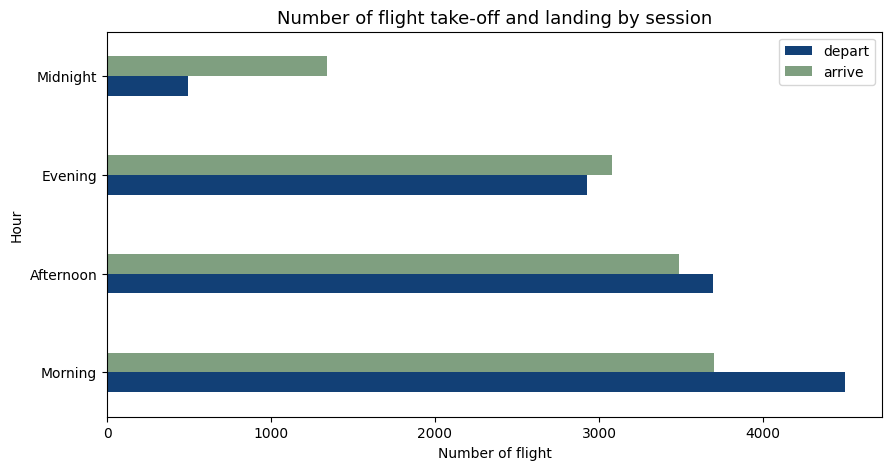

In [11]:
flights['depart_session']=flights['depart_hour'].apply(lambda x: 'Midnight' if 0<=x<=4 else( 'Morning' if 5<=x<=12 else 'Afternoon' if 13<=x<=18 else 'Evening' ))
flights['arrive_session']=flights['arrive_hour'].apply(lambda x: 'Midnight' if 0<=x<=4 else( 'Morning' if 5<=x<=12 else 'Afternoon' if 13<=x<=18 else 'Evening' ))
flights_session_depart = pd.DataFrame(flights['depart_session'].value_counts().rename('depart'))
flights_session_arrive = pd.DataFrame(flights['arrive_session'].value_counts().rename('arrive'))
flights_session = pd.concat([flights_session_depart, flights_session_arrive], axis = 1)
flights_session.fillna(value = 0, inplace = True)
flights_sess = flights_session.sort_index()

ax = flights_session.plot(kind = 'barh', figsize = (10,5), width = 0.4, fontsize= 10, color = ['#124076', '#7F9F80'] )
plt.title('Number of flight take-off and landing by session', size = 13)
plt.xlabel('Number of flight', size = 10)
plt.ylabel('Hour', size = 10)
plt.show()


Analysis on major hubs in Vietnam

In [12]:
sgn_depart = flights[flights['origin'] == 'SGN']
sgn_arrive = flights[flights['destination'] == 'SGN']

han_depart = flights[flights['origin'] == 'HAN']
han_arrive = flights[flights['destination'] == 'HAN']

dad_depart = flights[flights['origin'] == 'DAD']
dad_arrive = flights[flights['destination'] == 'DAD']

In [13]:
sgn_depart_hr = pd.DataFrame(sgn_depart['depart_hour'].value_counts().sort_index().rename('sgn_depart'))
sgn_arrive_hr = pd.DataFrame(sgn_arrive['arrive_hour'].value_counts().sort_index().rename('sgn_arrive'))
sgn = pd.concat([sgn_depart_hr, sgn_arrive_hr], axis = 1)
sgn.fillna(value = 0, inplace = True)
sgn.head()

,sgn_depart,sgn_arrive
0,47.0,204.0
1,52.0,197.0
4,36.0,29.0
5,239.0,0.0
6,197.0,20.0


In [14]:
han_depart_hr = pd.DataFrame(han_depart['depart_hour'].value_counts().sort_index().rename('han_depart'))
han_arrive_hr = pd.DataFrame(han_arrive['arrive_hour'].value_counts().sort_index().rename('han_arrive'))
han = pd.concat([han_depart_hr, han_arrive_hr], axis = 1)
han.fillna(value = 0, inplace = True)
han.head()

,han_depart,han_arrive
2,19.0,70.0
4,17.0,13.0
5,192.0,0.0
6,212.0,0.0
7,110.0,124.0


In [15]:
dad_depart_hr = pd.DataFrame(dad_depart['depart_hour'].value_counts().sort_index().rename('dad_depart'))
dad_arrive_hr = pd.DataFrame(dad_arrive['arrive_hour'].value_counts().sort_index().rename('dad_arrive'))
dad = pd.concat([dad_depart_hr, dad_arrive_hr], axis = 1)
dad.fillna(value = 0, inplace = True)
dad.head()

,dad_depart,dad_arrive
0,63,50.0
1,102,84.0
2,10,0.0
5,20,0.0
6,56,59.0


In [16]:
all_major_icao = pd.concat([sgn, han, dad], axis = 1)
all_major_icao = all_major_icao.fillna(0)
all_major_icao.sort_index(inplace = True)
pd.set_option('display.float_format', lambda x: '%.1f' % x)
all_major_icao.head()

,sgn_depart,sgn_arrive,han_depart,han_arrive,dad_depart,dad_arrive
0,47.0,204.0,0.0,147.0,63.0,50.0
1,52.0,197.0,0.0,147.0,102.0,84.0
2,0.0,38.0,19.0,70.0,10.0,0.0
3,0.0,111.0,0.0,90.0,0.0,0.0
4,36.0,29.0,17.0,13.0,0.0,0.0


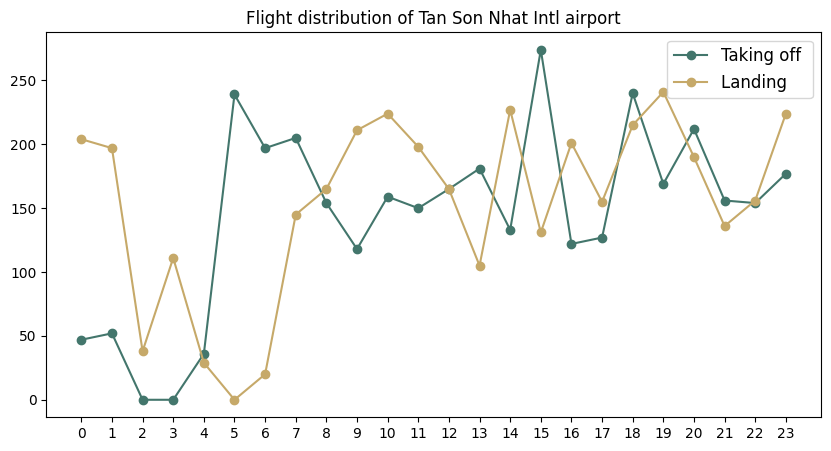

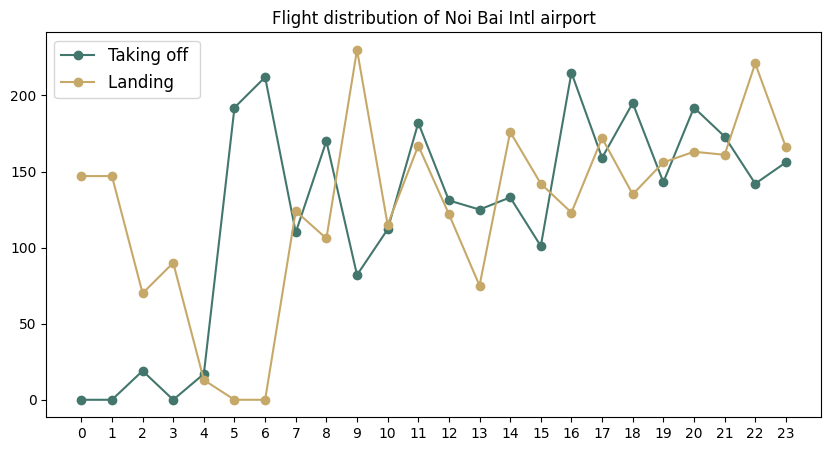

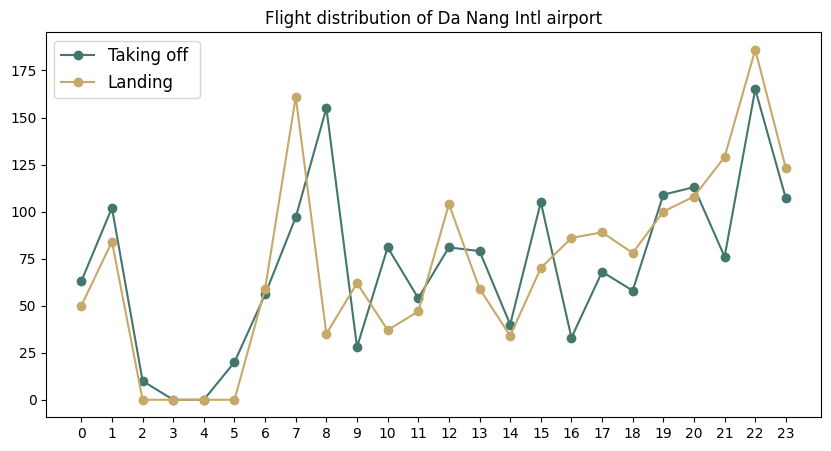

In [17]:
fig = plt.figure(figsize=(10, 5))

plt.title('Flight distribution of Tan Son Nhat Intl airport')

plt.plot(all_major_icao['sgn_depart'],marker="o", color = '#43766C')
plt.plot(all_major_icao['sgn_arrive'],marker="o", color = '#C6A969')
plt.xticks(np.arange(0,24,1))
plt.legend(["Taking off ", "Landing "],prop={"size":12})

fig = plt.figure(figsize=(10, 5))
plt.title('Flight distribution of Noi Bai Intl airport')
plt.plot(all_major_icao['han_depart'],marker="o", color = '#43766C')
plt.plot(all_major_icao['han_arrive'],marker="o", color = '#C6A969')
plt.xticks(np.arange(0,24,1))
plt.legend(["Taking off ", "Landing "],prop={"size":12})

fig = plt.figure(figsize=(10, 5))
plt.title('Flight distribution of Da Nang Intl airport')
plt.plot(all_major_icao['dad_depart'],marker="o", color = '#43766C')
plt.plot(all_major_icao['dad_arrive'],marker="o", color = '#C6A969')
plt.xticks(np.arange(0,24,1))
plt.legend(["Taking off ", "Landing"],prop={"size":12})

In [18]:
revenue = flights.groupby(['airliner']).sum(['price']).rename(columns = {'price':'revenue'})
revenue['mean_price'] = revenue['revenue']/(flights.groupby(['airliner']).count()['price'])
revenue = revenue[['revenue', 'mean_price']]
pd.set_option('display.float_format', lambda x: '%.5f' % x)
revenue['revenue_percentage'] = (revenue['revenue']/revenue['revenue'].sum())*100
revenue['revenue'] = revenue['revenue']/1000000000

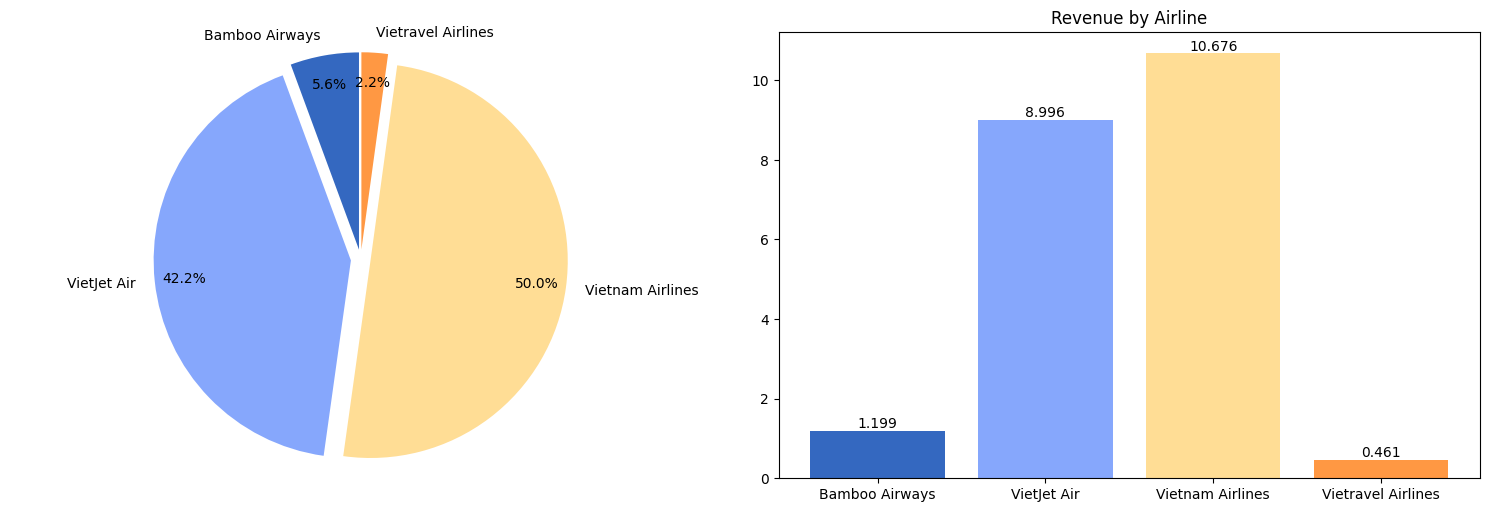

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,5))
ax1.pie(revenue['revenue'], colors = ['#3468C0','#86A7FC','#FFDD95','#FF9843'] 
        , labels=revenue.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = (0.05,0.05,0.05,0.05))
ax2.bar(revenue.index, revenue['revenue'], color = ['#3468C0','#86A7FC','#FFDD95','#FF9843'])
plt.tight_layout()
ax2.bar_label(ax2.containers[0], fmt='%.3f', label_type='edge')
ax1.axis('equal')
plt.title('Revenue by Airline')
plt.show()

Comment: Vietnam Airlines earns the most profit this whole period, with revenue of more than 10.5 billion VND, following by Vietjet Air with approximately 9 billion VND.

### Statistics of flight time from the capital - Ha Noi

In [20]:
han_depart = han_depart[['destination', 'duration_min']]
han_depart['destination'].value_counts()
han_df = pd.DataFrame(han_depart['destination'].value_counts())
han_df.head()

,count
destination,
SGN,1008
DAD,934
CXR,317
PQC,151
DLI,137


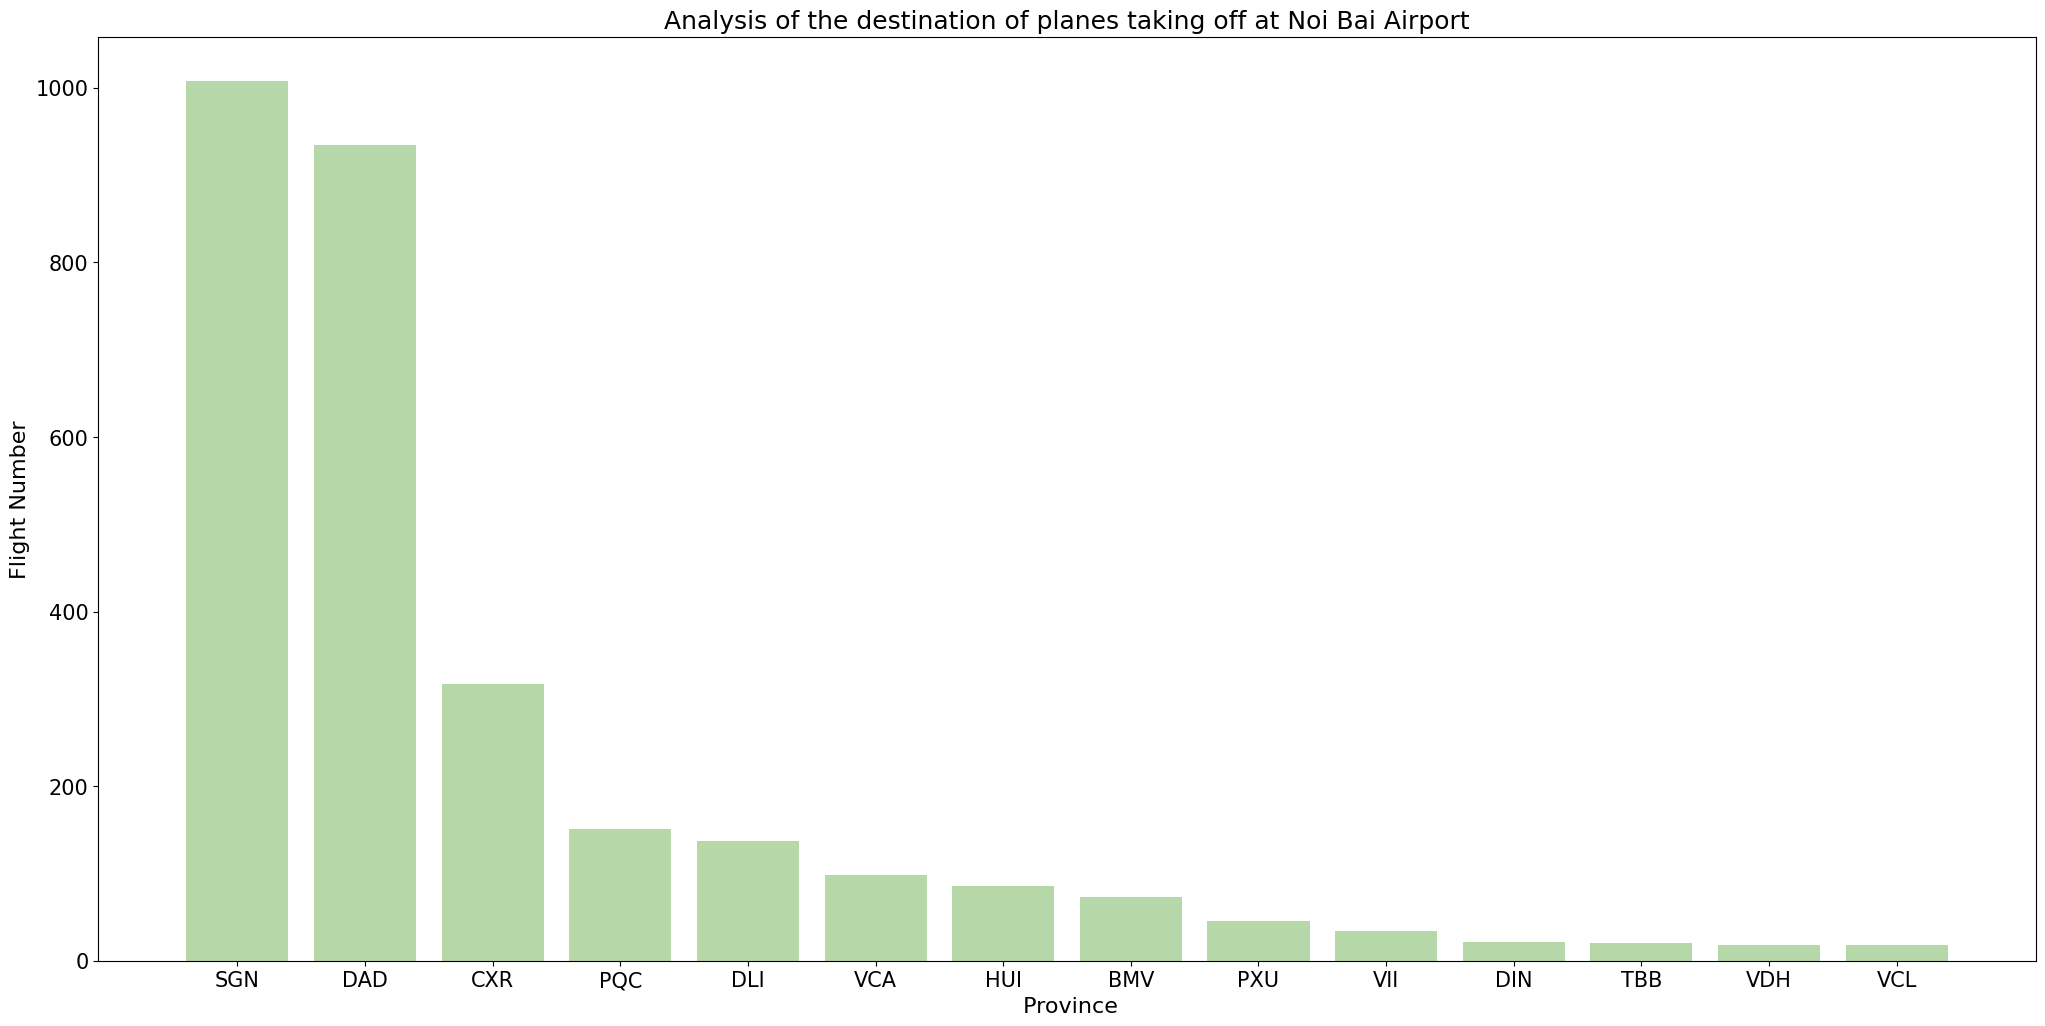

In [21]:
fig = plt.figure(figsize=(25, 12))
plt.bar(han_df.index, han_df['count'].values, color='#b6d7a8')
N = 5
    
plt.xlabel(" Province", size = 16)
plt.ylabel("Flight Number", size = 16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Analysis of the destination of planes taking off at Noi Bai Airport",size = 18);